In [ ]:
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="True"

from matplotlib import pyplot as plt
plt.rcParams['axes.unicode_minus'] = False 
plt.rc('font',family='Times New Roman')

from model.seanet import get_model

import torch
import pickle

In [40]:
# create network
sea_net = get_model().cuda()
# load pretrained parameters
sea_net.load_state_dict(torch.load("checkpoints/sea_params.pth")['model'])

<All keys matched successfully>

In [43]:
# load data
examples = pickle.load(open("examples.pkl",'rb'))

# 10 exmaples of seismic inputs, each of shape (3 ,6000) 
data = torch.from_numpy(examples['data'])
print("data shape:",data.shape)

# according indices of arrival time of P-phases and S phases
labels = torch.from_numpy(examples['spt_sst'])
print("labels:",labels)

data shape: torch.Size([10, 3, 6000])
labels: tensor([[ 900, 1753],
        [ 899, 1512],
        [ 700, 2007],
        [ 700,  805],
        [ 500,  597],
        [ 800, 1010],
        [ 900, 1612],
        [ 607, 1500],
        [ 800, 1030],
        [ 798,  948]], dtype=torch.int32)


In [60]:
# excute network inference
sea_net.eval()
with torch.no_grad():
    spt_preds, sst_preds, _ = sea_net(data.cuda())
spt_preds = spt_preds.cpu()
sst_preds = sst_preds.cpu()

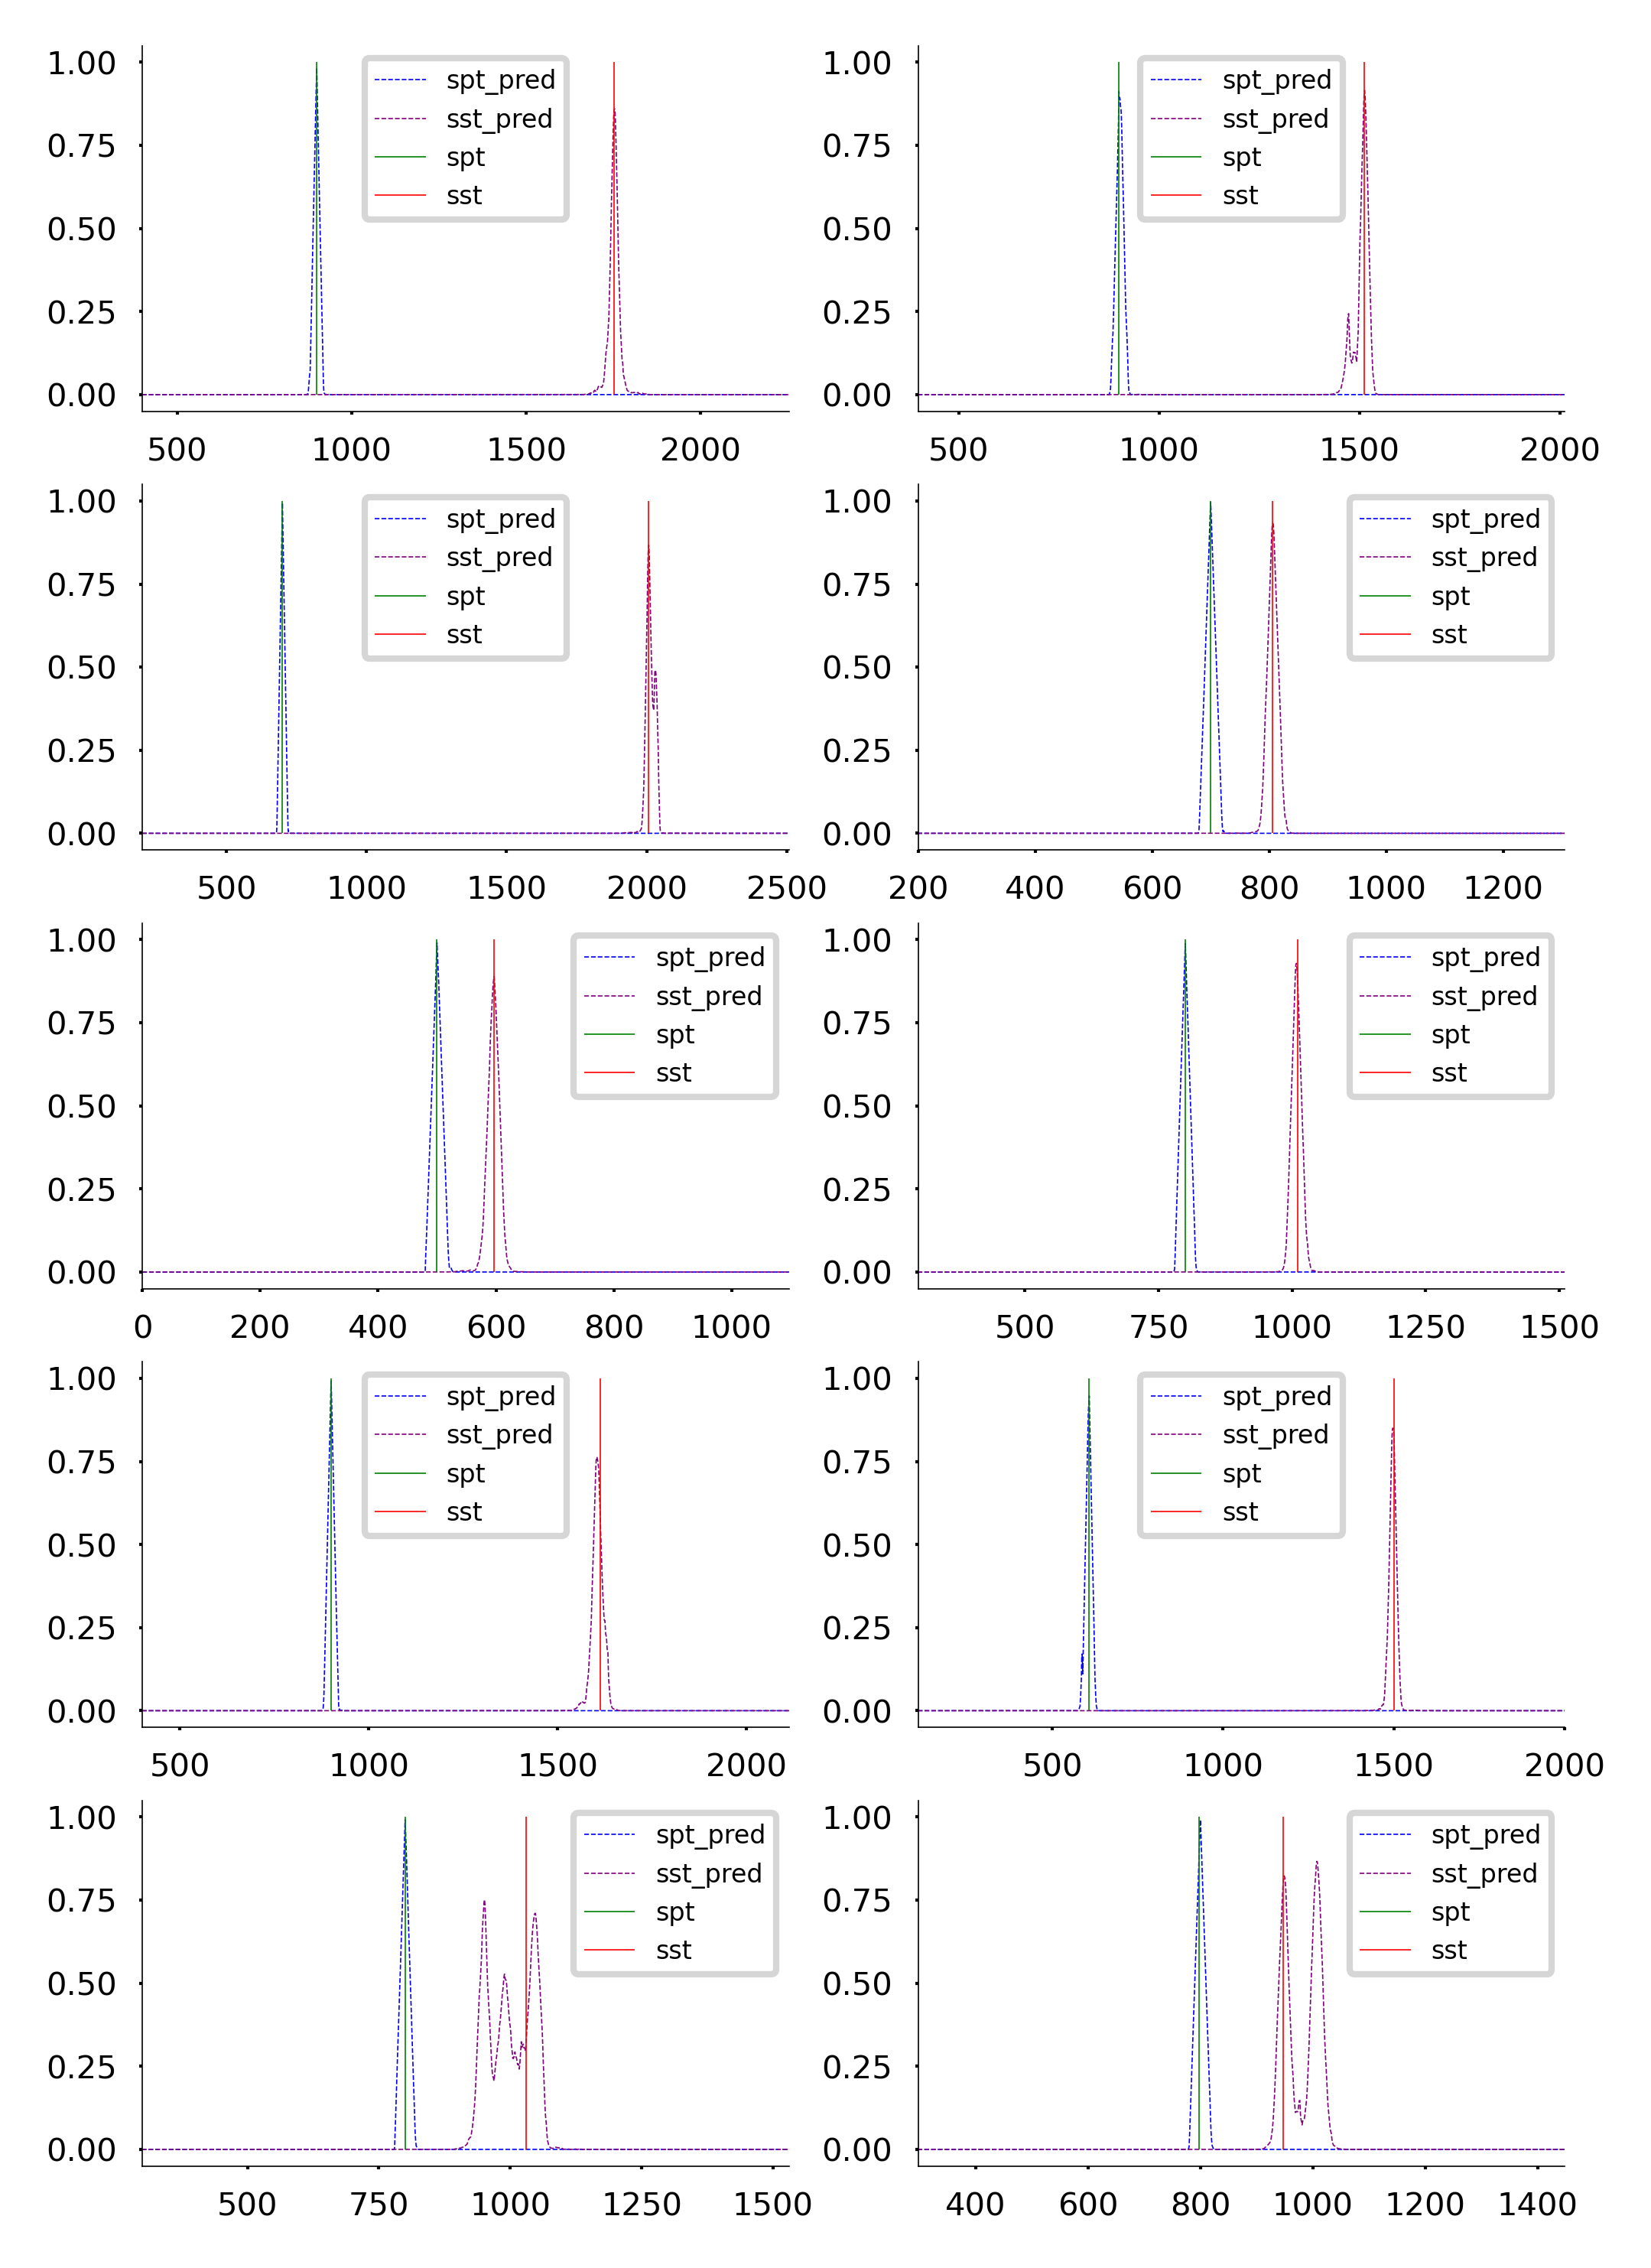

In [82]:
fig, axes = plt.subplots(5,2,figsize = (4,6), dpi=600)

for i in range(5):
    for j in range(2):
        ax = axes[i][j]
        ax.tick_params('both', length=0.5, width=0.5, labelsize=5)
        for direction in ['bottom', 'left']:
            ax.spines[direction].set_linewidth(0.2)
        for direction in ['top', 'right']:
            ax.spines[direction].set_visible(False)  
            
        index = i * 2 + j
            
        spt, sst = labels[index]
            
        ax.plot(spt_preds[index], lw=0.2, linestyle='--', color='blue',label = "spt_pred" )
        ax.plot(sst_preds[index], lw=0.2, linestyle='--', color='purple',label = 'sst_pred')
        ax.vlines(spt, ymax=1.0, ymin=0.0, lw=0.2, colors='green', label="spt")
        ax.vlines(sst, ymax=1.0, ymin=0.0, lw=0.2, colors='red', label='sst')
        ax.set_xbound(spt - 500, sst + 500)
        ax.legend(fontsize=4)
